# Task b

Frederik Rogge, Mouhammad Abu Rasheed and Homa Priya Tarigopula

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt
from sklearn.utils import resample
import os
%matplotlib inline
from models import *

from copy import deepcopy
np.random.seed(0)


In [2]:
# Create data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)

def FrankeFunction(x, y):
    """
    Returns value of Franke function at (x, y).
    """    
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


# Compute z
z = FrankeFunction(x, y)

# Create features as pairs of (x, y)
features = np.stack([x.ravel(), y.ravel()], axis=1)


# Get labels
labels = z.ravel()
labels = labels.reshape((-1,1))


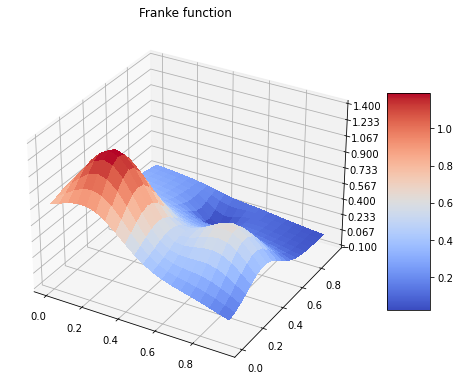

In [3]:
def plot_function(x, y, z, title=None):
    # Plot function
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if title is not None:
        plt.title(title)
    
    plt.show()
    
plot_function(x, y, z, 'Franke function')

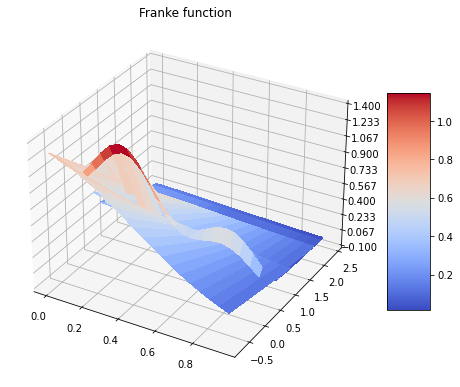

In [4]:

    

x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
y= y+np.random.normal(0 , 1.0 , y.shape )
x, y = np.meshgrid(x, y)

def FrankeFunction(x, y):
    """
    Returns value of Franke function at (x, y).
    """    
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


# Compute z
z = FrankeFunction(x, y)



plot_function(x, y, z, 'Franke function')

### Part b) : Bias Variance trade-off on Franke function

#### Refer task 1 for MSE as a function of complexity 

### Part b) : Bootstrap Resampling technique

In [5]:
def bias_variance_error(y_test, y_pred):
    error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    return error, bias, variance

def bootstrap(X_train, y_train, x_test, y_test,
              percentage_of_train_data=1.0, degree_of_polynomial=14,
              scaling=False, add_noise=False, mean=0.0, std=0.1,
              number_of_bootstraps=100,solver=LinearRegression, **solver_args):
    e_ = np.zeros(degree_of_polynomial-1)
    b_ = np.zeros(degree_of_polynomial-1)
    v_ = np.zeros(degree_of_polynomial-1)
    X_train_actual= deepcopy(X_train)
    y_train_actual= deepcopy(y_train)
    
    indices = np.random.choice(len(y_train), int(percentage_of_train_data*len(y_train)), replace=False)
    X_train, y_train = X_train_actual[indices], y_train_actual[indices]
    # iterate over the polyniomial degree
    for d in range(1,degree_of_polynomial):
        #scale data if necessary
        if scaling == True:
            model = make_pipeline(PolynomialFeatures(degree=d ),StandardScaler(with_std= True), solver(**solver_args))
        else:
            model = make_pipeline(PolynomialFeatures(degree=d), solver(**solver_args))
        #resample and estimate the bias, varaince  and error on the test data
        y_pred = np.zeros((y_test.shape[0], number_of_bootstraps))
        for b in range(number_of_bootstraps):
            x_, y_ = resample(X_train,y_train, random_state=b)

            model_output = model.fit(x_, y_).predict(x_test).ravel()
            #print('here ', x_.shape, y_.shape, x_test.shape, model_output.shape)
            y_pred[:,b]=model_output
        error, bias, var= bias_variance_error(y_test, y_pred)

        e_[d-1]= error
        b_[d-1]= bias
        v_[d-1]= var
    return e_, b_, v_

#### Bootstrap bias variance tradeoff -1

Here we examine ths bias-variance tradeoff on the test set without noise and without scaling

(320, 1) (80, 1)


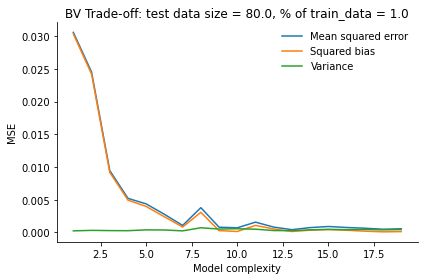

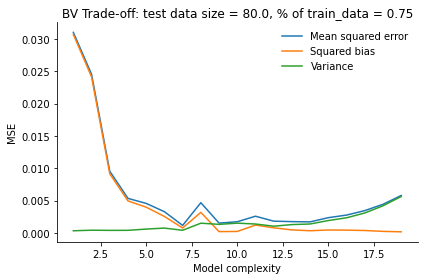

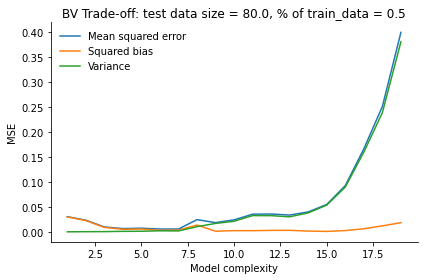

In [8]:
degree_of_polynomial=20
add_noise= False

if add_noise :
    np.random.seed(1)
    labels_n = labels +  np.random.normal(0 , 1, labels.shape )
else :
    labels_n = labels
    
#define the input argumets for the solver 
solver_args ={ 'fit_intercept': True }

# Hold out some test data that is never used in training.
X_train, x_test, y_train, y_test = train_test_split(features, labels_n, 
                                                    test_size=0.2, random_state = 2021)


print(y_train.shape, y_test.shape)
for dat in [1.0, 0.75, 0.5]:
    e,b,v = bootstrap(X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test,
                  percentage_of_train_data= dat, degree_of_polynomial=degree_of_polynomial,
                  scaling=False,
                  number_of_bootstraps=5000,solver=LinearRegression, **solver_args)

    polynomial = np.arange(1, degree_of_polynomial)
    title = 'BV Trade-off: test data size = '+str(np.round(0.2*len(labels), 2))+', % of train_data = '+ str(dat)
    plot_metric(y=[e,b,v], x= polynomial, show= True, title=title , name='b_without_noise_without_scaling_'+ str(dat)+'.png', x_label='Model complexity', y_label='MSE',  save=True, legend = ['Mean squared error','Squared bias','Variance'])

#### Bootstrap bias variance tradeoff - 2

Here we examine ths bias-variance tradeoff on the test set without noise and with scaling

In [ ]:
add_noise= False
degree_of_polynomial=15
if add_noise :
    np.random.seed(1)
    labels_n = labels +  np.random.normal(0 , 1, labels.shape )
else :
    labels_n = labels
    
#define the input argumets for the solver 
solver_args ={ 'fit_intercept': True }

# Hold out some test data that is never used in training.
X_train, x_test, y_train, y_test = train_test_split(features, labels_n, 
                                                    test_size=0.2, random_state = 2021)


print(y_train.shape, y_test.shape)
for dat in [1.0, 0.75, 0.5]:
    e,b,v = bootstrap(X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test,
                  percentage_of_train_data= dat, degree_of_polynomial=degree_of_polynomial,
                  scaling=True,
                  number_of_bootstraps=5000,solver=LinearRegression, **solver_args)

    polynomial = np.arange(1, degree_of_polynomial)
    title = 'BV Trade-off: test data size = '+str(np.round(0.2*len(labels), 2))+', % of train_data = '+ str(dat)
    plot_metric(y=[e,b,v], x= polynomial, show= True, title=title , name='b_without_noise_with_scaling_'+ str(dat)+'.png', x_label='Model complexity', y_label='MSE',  save=True, legend = ['Mean squared error','Squared bias','Variance'])

   

#### Bootstrap bias variance tradeoff - 3

Here we examine ths bias-variance tradeoff on the test set with noise and with scaling

In [ ]:
add_noise= True
degree_of_polynomial=20
if add_noise :
    np.random.seed(1)
    labels_n = labels +  np.random.normal(0 , 1, labels.shape )
else :
    labels_n = labels
    
#define the input argumets for the solver 
solver_args ={ 'fit_intercept': True }

# Hold out some test data that is never used in training.
X_train, x_test, y_train, y_test = train_test_split(features, labels_n, 
                                                    test_size=0.2, random_state = 2021)


print(y_train.shape, y_test.shape)
for dat in [1.0, 0.75, 0.5]:
    e,b,v = bootstrap(X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test,
                  percentage_of_train_data= dat, degree_of_polynomial=degree_of_polynomial,
                  scaling=True,
                  number_of_bootstraps=5000,solver=LinearRegression, **solver_args)

    polynomial = np.arange(1, degree_of_polynomial)
    title = 'BV Trade-off: test data size = '+str(np.round(0.2*len(labels), 2))+', % of train_data = '+ str(dat)
    plot_metric(y=[e,b,v], x= polynomial, show= True, title=title , name='b_with_noise_with_scaling_'+ str(dat)+'.png', x_label='Model complexity', y_label='MSE',  save=True, legend = ['Mean squared error','Squared bias','Variance'])
    
    print(e,b,v)


#### Bootstrap bias variance tradeoff - 3 with lower noise

Here we examine ths bias-variance tradeoff on the test set with noise and with scaling

(320, 1) (80, 1)


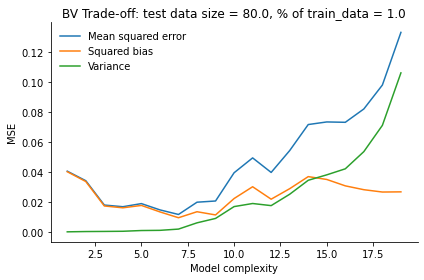

[0.04077473 0.03440998 0.01819571 0.01708788 0.01916307 0.01497807
 0.01192163 0.02009921 0.02089723 0.03971214 0.04962374 0.03993092
 0.05451405 0.07184951 0.07358175 0.07334249 0.08223643 0.09817732
 0.13327434] [0.04042069 0.03387012 0.01757791 0.01636141 0.01794385 0.01363272
 0.00974498 0.01375031 0.01161642 0.02254011 0.03039709 0.02211035
 0.0291086  0.03714583 0.03525216 0.03098976 0.02842806 0.02687353
 0.02699317] [0.00035403 0.00053986 0.0006178  0.00072647 0.00121922 0.00134535
 0.00217665 0.00634889 0.00928081 0.01717203 0.01922665 0.01782057
 0.02540545 0.03470368 0.03832959 0.04235273 0.05380838 0.07130379
 0.10628117]


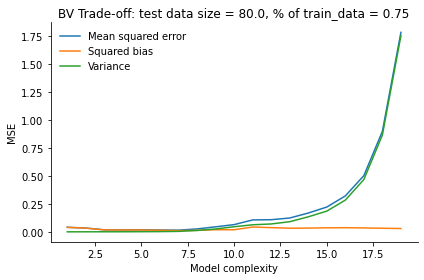

[0.04108656 0.03420637 0.01846086 0.01790537 0.01860239 0.01673063
 0.01539545 0.02641957 0.04515965 0.06491643 0.10690483 0.10890662
 0.12407644 0.16856661 0.22224859 0.32175136 0.50340981 0.89955824
 1.78597708] [0.04062984 0.03353588 0.01759798 0.0169646  0.01696611 0.01425015
 0.01093606 0.01339813 0.01933923 0.01901502 0.04338125 0.03803637
 0.03296695 0.03384323 0.03645886 0.03741007 0.03516537 0.03261161
 0.02990558] [4.56723921e-04 6.70493942e-04 8.62871864e-04 9.40776336e-04
 1.63627222e-03 2.48047610e-03 4.45939070e-03 1.30214471e-02
 2.58204180e-02 4.59014079e-02 6.35235811e-02 7.08702518e-02
 9.11094860e-02 1.34723379e-01 1.85789726e-01 2.84341292e-01
 4.68244440e-01 8.66946632e-01 1.75607150e+00]


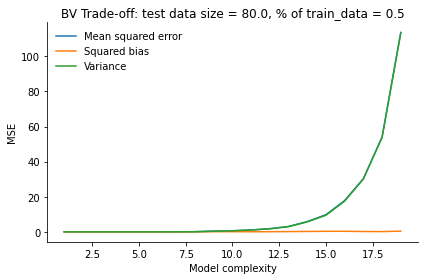

[4.28395422e-02 3.54063468e-02 1.95260226e-02 2.06976994e-02
 2.62106627e-02 2.13594058e-02 2.98872275e-02 9.86761602e-02
 4.10907211e-01 6.30334327e-01 1.07497743e+00 1.79329643e+00
 3.06947277e+00 5.85470673e+00 9.76846989e+00 1.78375739e+01
 3.02898408e+01 5.39517809e+01 1.13654746e+02] [0.04214854 0.03434266 0.01828493 0.0189749  0.02291295 0.01554765
 0.01324977 0.0453654  0.07881228 0.08446614 0.04717197 0.06938649
 0.13508173 0.20945846 0.31004422 0.32279034 0.18074362 0.13394176
 0.4054151 ] [6.91002482e-04 1.06369170e-03 1.24109398e-03 1.72279991e-03
 3.29770996e-03 5.81175422e-03 1.66374542e-02 5.33107644e-02
 3.32094926e-01 5.45868182e-01 1.02780546e+00 1.72390993e+00
 2.93439104e+00 5.64524827e+00 9.45842568e+00 1.75147835e+01
 3.01090972e+01 5.38178391e+01 1.13249331e+02]


In [11]:
add_noise= True
degree_of_polynomial=20
if add_noise :
    np.random.seed(1)
    labels_n = labels +  np.random.normal(0 , 0.1, labels.shape )
else :
    labels_n = labels
    
#define the input argumets for the solver 
solver_args ={ 'fit_intercept': True }

# Hold out some test data that is never used in training.
X_train, x_test, y_train, y_test = train_test_split(features, labels_n, 
                                                    test_size=0.2, random_state = 2021)


print(y_train.shape, y_test.shape)
for dat in [1.0, 0.75, 0.5]:
    e,b,v = bootstrap(X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test,
                  percentage_of_train_data= dat, degree_of_polynomial=degree_of_polynomial,
                  scaling=True,
                  number_of_bootstraps=5000,solver=LinearRegression, **solver_args)

    polynomial = np.arange(1, degree_of_polynomial)
    title = 'BV Trade-off: test data size = '+str(np.round(0.2*len(labels), 2))+', % of train_data = '+ str(dat)
    plot_metric(y=[e,b,v], x= polynomial, show= True, title=title , name='b_with_noise=0.1_with_scaling_'+ str(dat)+'.png', x_label='Model complexity', y_label='MSE',  save=True, legend = ['Mean squared error','Squared bias','Variance'])
    
    print(e,b,v)
